In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Global_Plant_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As we seen that lost of columns are empty so we will drop this.

In [5]:
df.drop(columns= ['other_fuel2','other_fuel3','wepp_id','generation_gwh_2019','estimated_generation_gwh','country','country_long','name','gppd_idnr','owner','url','generation_gwh_2013','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [7]:
df.shape

(907, 13)

<AxesSubplot:>

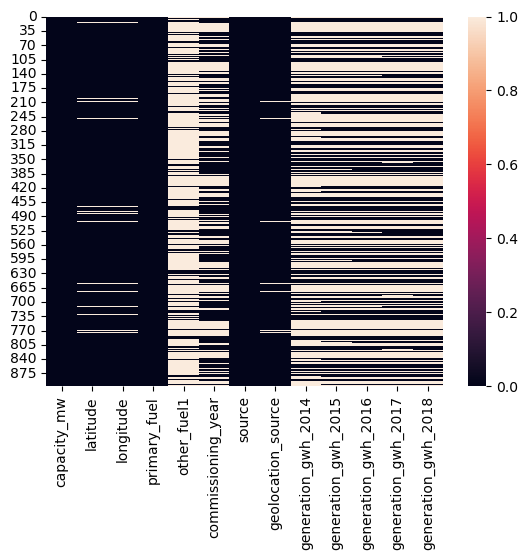

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['latitude'].mean()  

21.19791811846691

In [10]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [11]:
df['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

In [12]:
df['geolocation_source'].mode() 

0    WRI
Name: geolocation_source, dtype: object

In [13]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [14]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [15]:
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [16]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

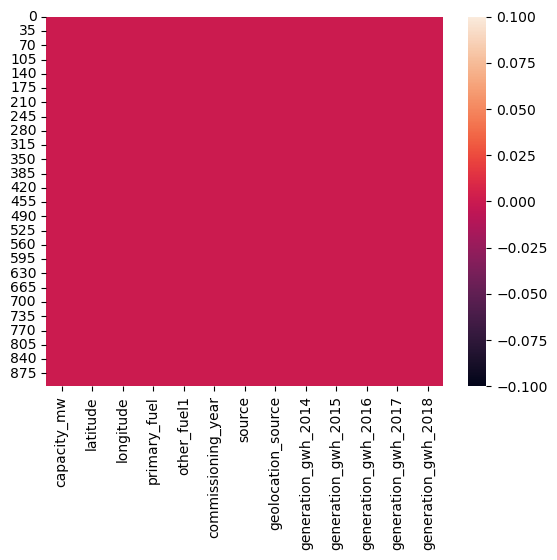

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.815073,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [19]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [20]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


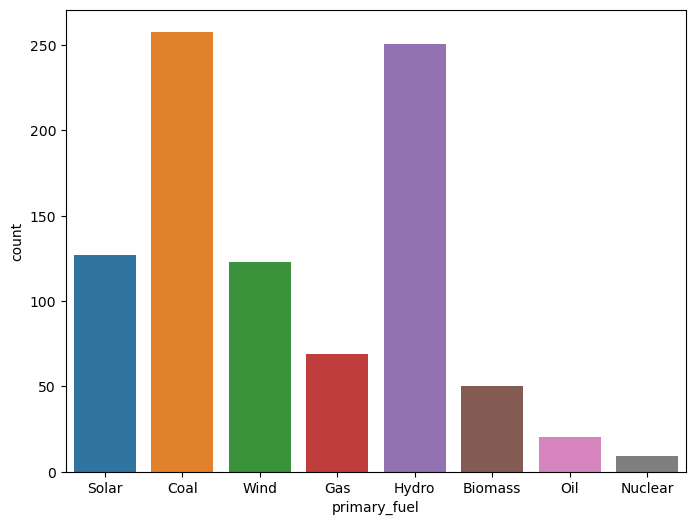

In [21]:
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


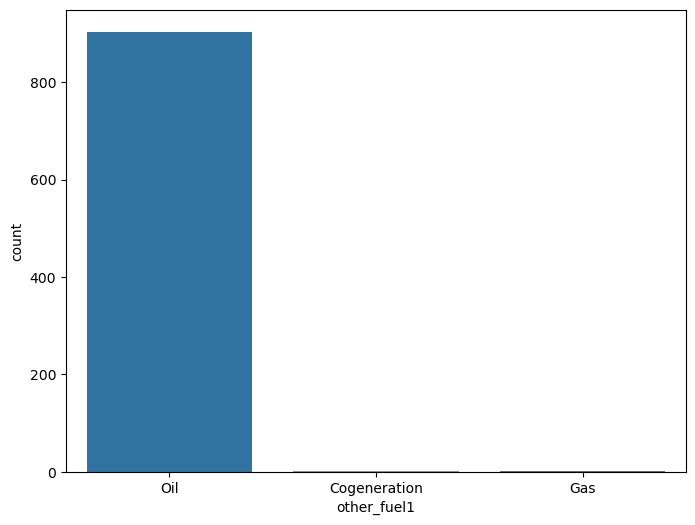

In [22]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

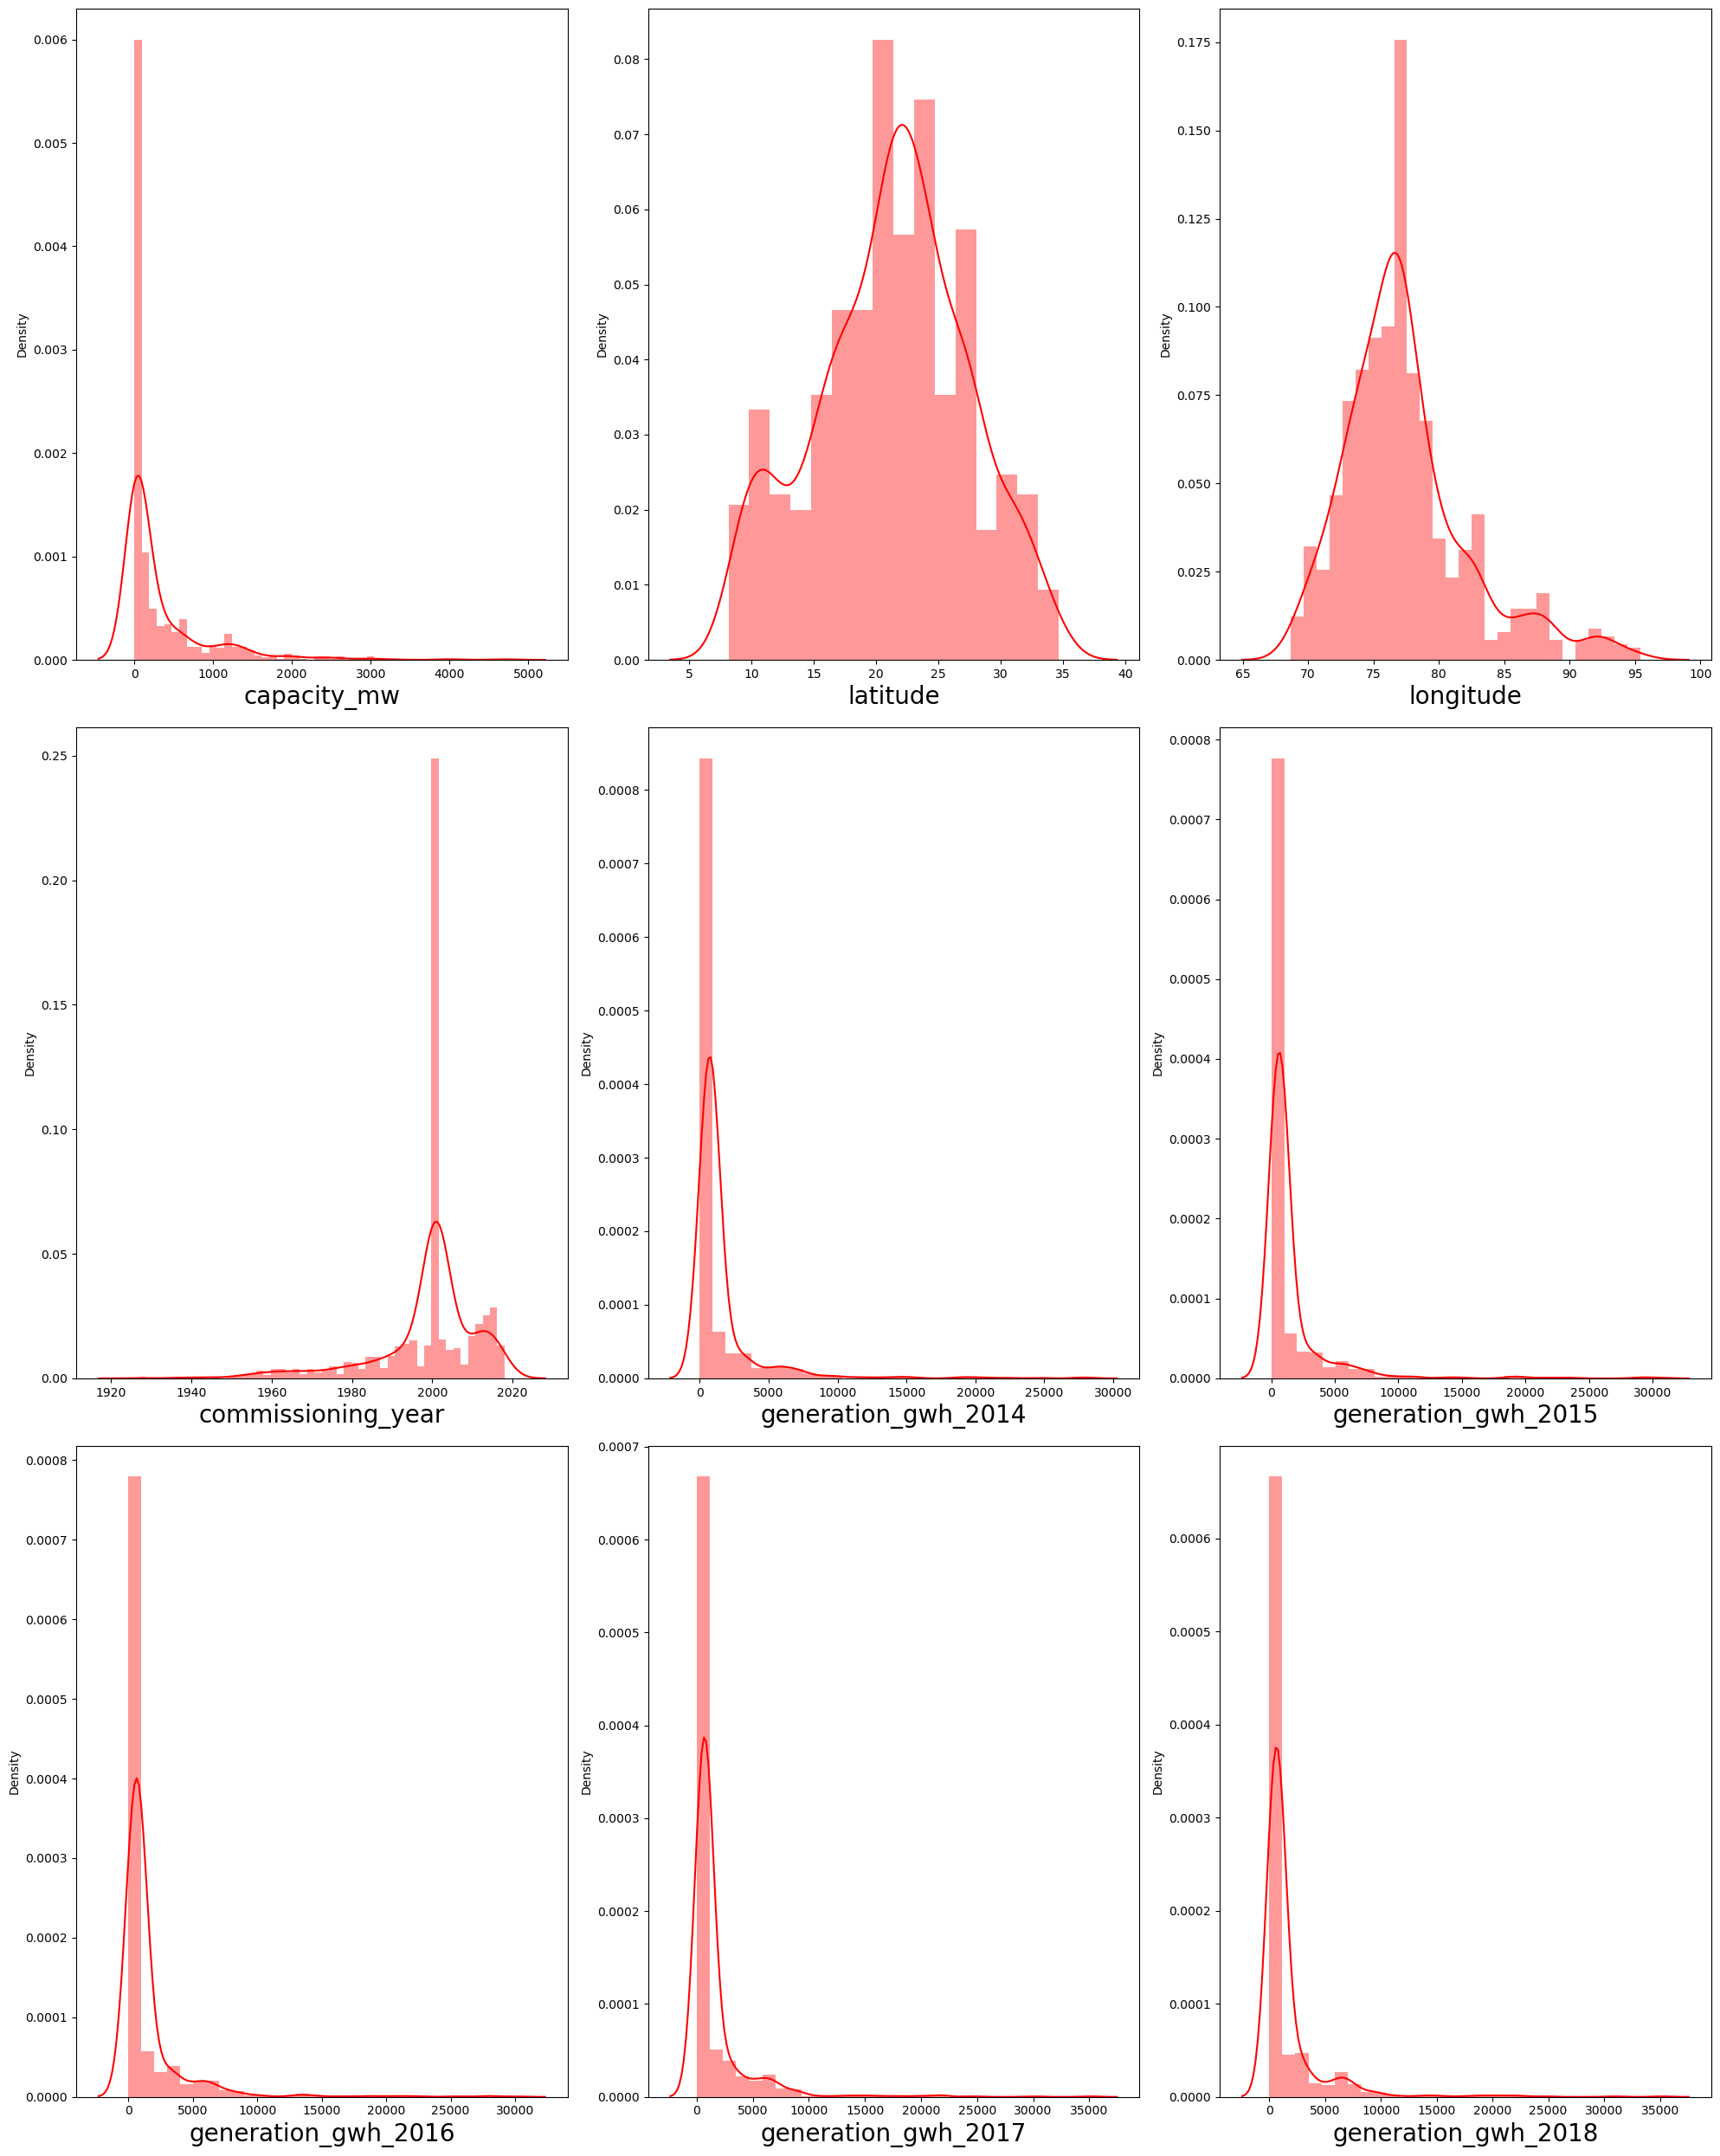

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

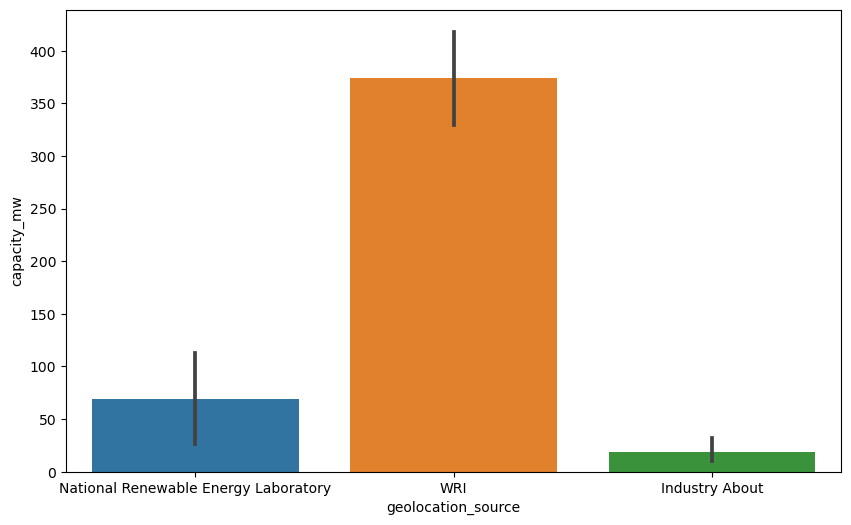

In [24]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

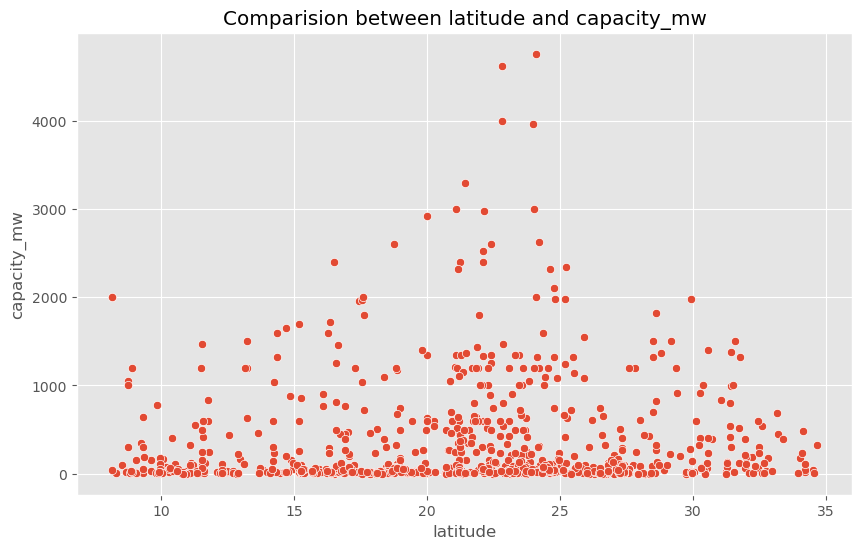

In [25]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

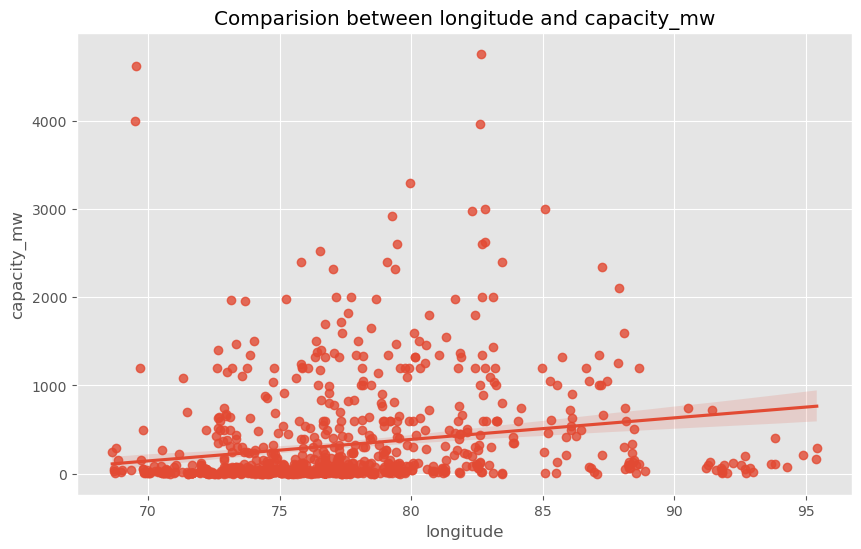

In [26]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

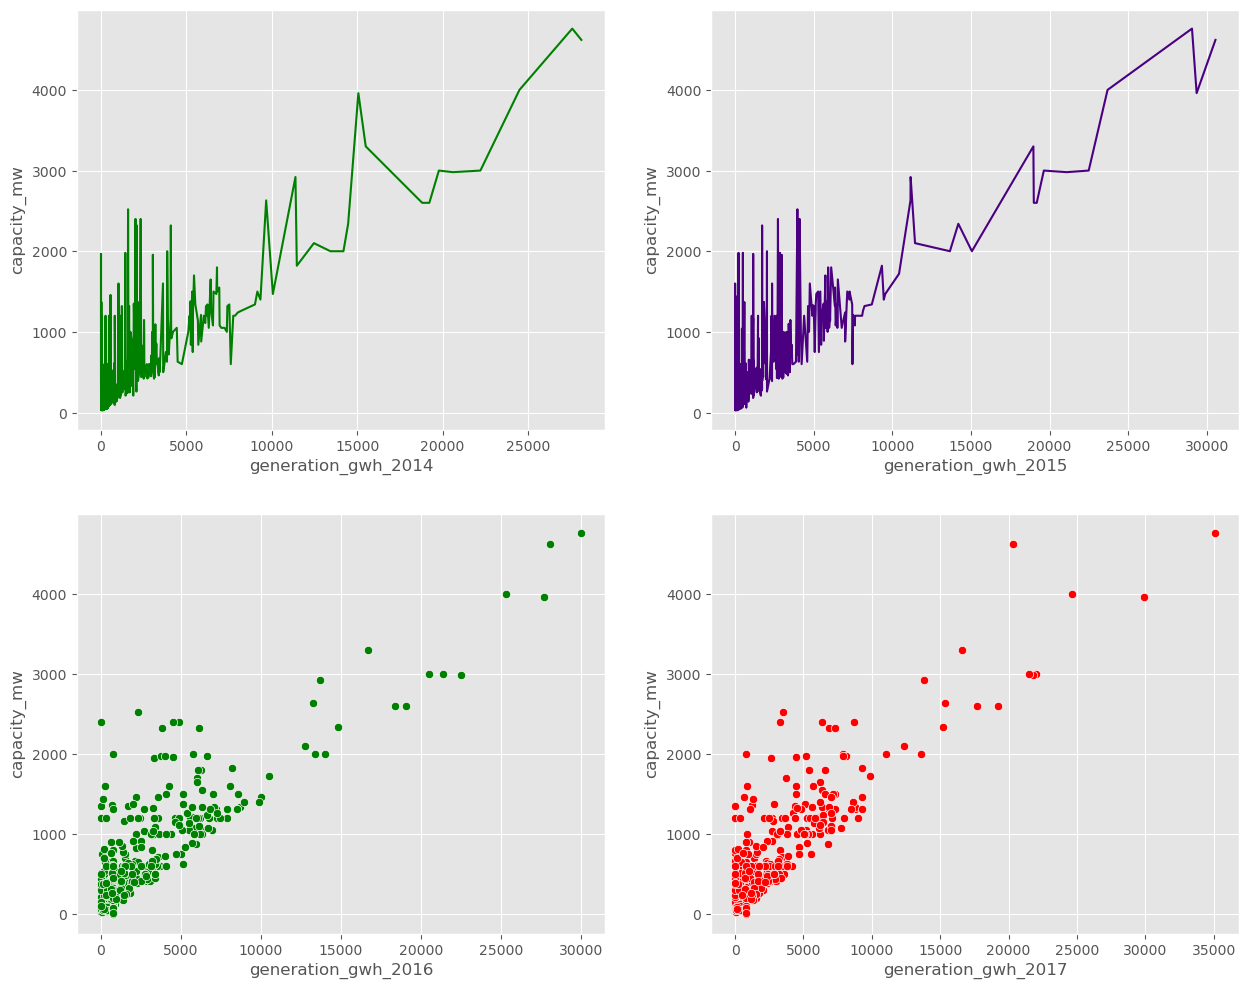

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

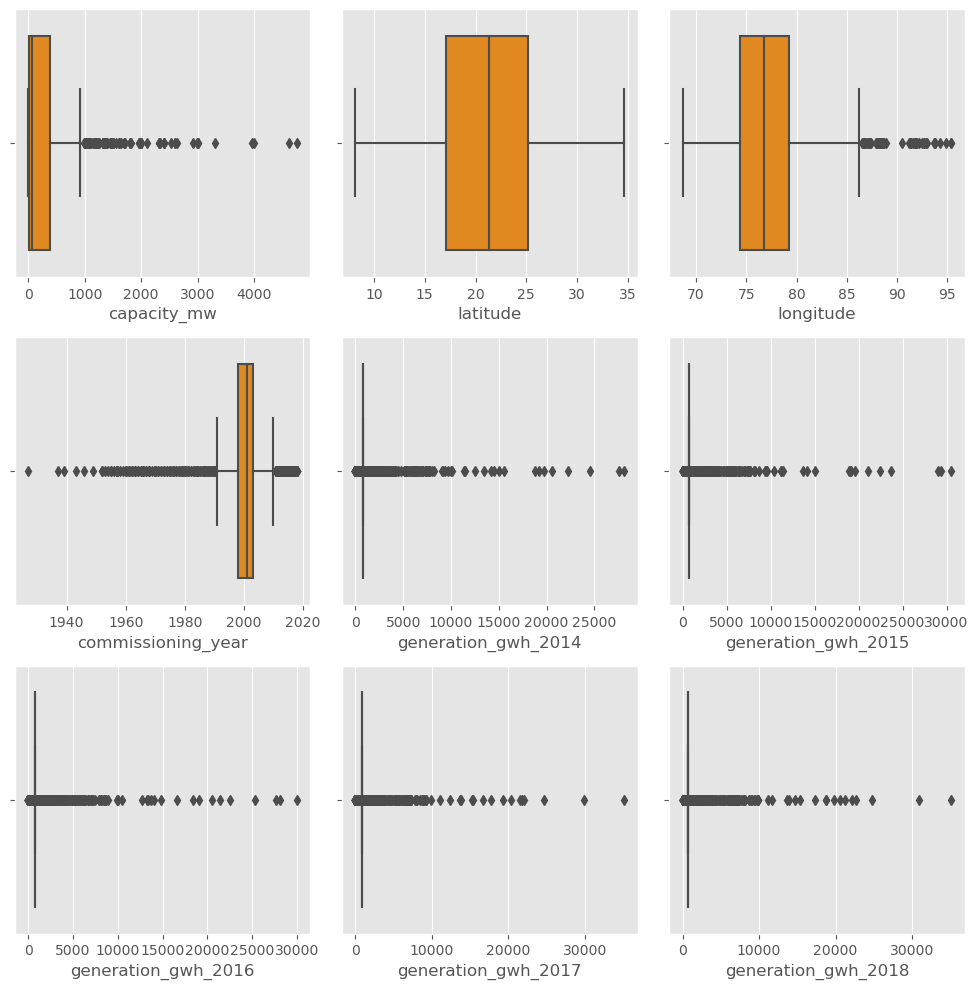

In [28]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [29]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [30]:
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394


In [31]:
new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [32]:
new_df.shape

(871, 13)

In [35]:
categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

In [36]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

In [37]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.049673,0.248179,-0.395254,-0.002436,0.244169,-0.267822,0.228364,0.621908,0.682360,0.751083,0.789699,0.815824
latitude,0.049673,1.000000,-0.008532,-0.002550,0.036313,0.087566,0.067632,-0.198671,0.081717,0.071577,0.058038,0.071876,0.065097
longitude,0.248179,-0.008532,1.000000,-0.378734,0.029318,0.034890,-0.236572,0.263454,0.113180,0.147656,0.187944,0.188800,0.196780
primary_fuel,-0.395254,-0.002550,-0.378734,1.000000,0.006313,-0.052034,0.039778,-0.478696,-0.247999,-0.274218,-0.284447,-0.286974,-0.296262
other_fuel1,-0.002436,0.036313,0.029318,0.006313,1.000000,0.043502,0.027734,-0.022260,-0.001148,0.005467,0.014815,0.011173,0.022038
commissioning_year,0.244169,0.087566,0.034890,-0.052034,0.043502,1.000000,0.104561,-0.076632,0.089851,0.147299,0.204982,0.224260,0.221943
source,-0.267822,0.067632,-0.236572,0.039778,0.027734,0.104561,1.000000,-0.500208,-0.135034,-0.149922,-0.152047,-0.149500,-0.158883
geolocation_source,0.228364,-0.198671,0.263454,-0.478696,-0.022260,-0.076632,-0.500208,1.000000,0.108379,0.120329,0.122034,0.119989,0.127521
generation_gwh_2014,0.621908,0.081717,0.113180,-0.247999,-0.001148,0.089851,-0.135034,0.108379,1.000000,0.912697,0.802435,0.747718,0.739556
generation_gwh_2015,0.682360,0.071577,0.147656,-0.274218,0.005467,0.147299,-0.149922,0.120329,0.912697,1.000000,0.908512,0.831409,0.822716


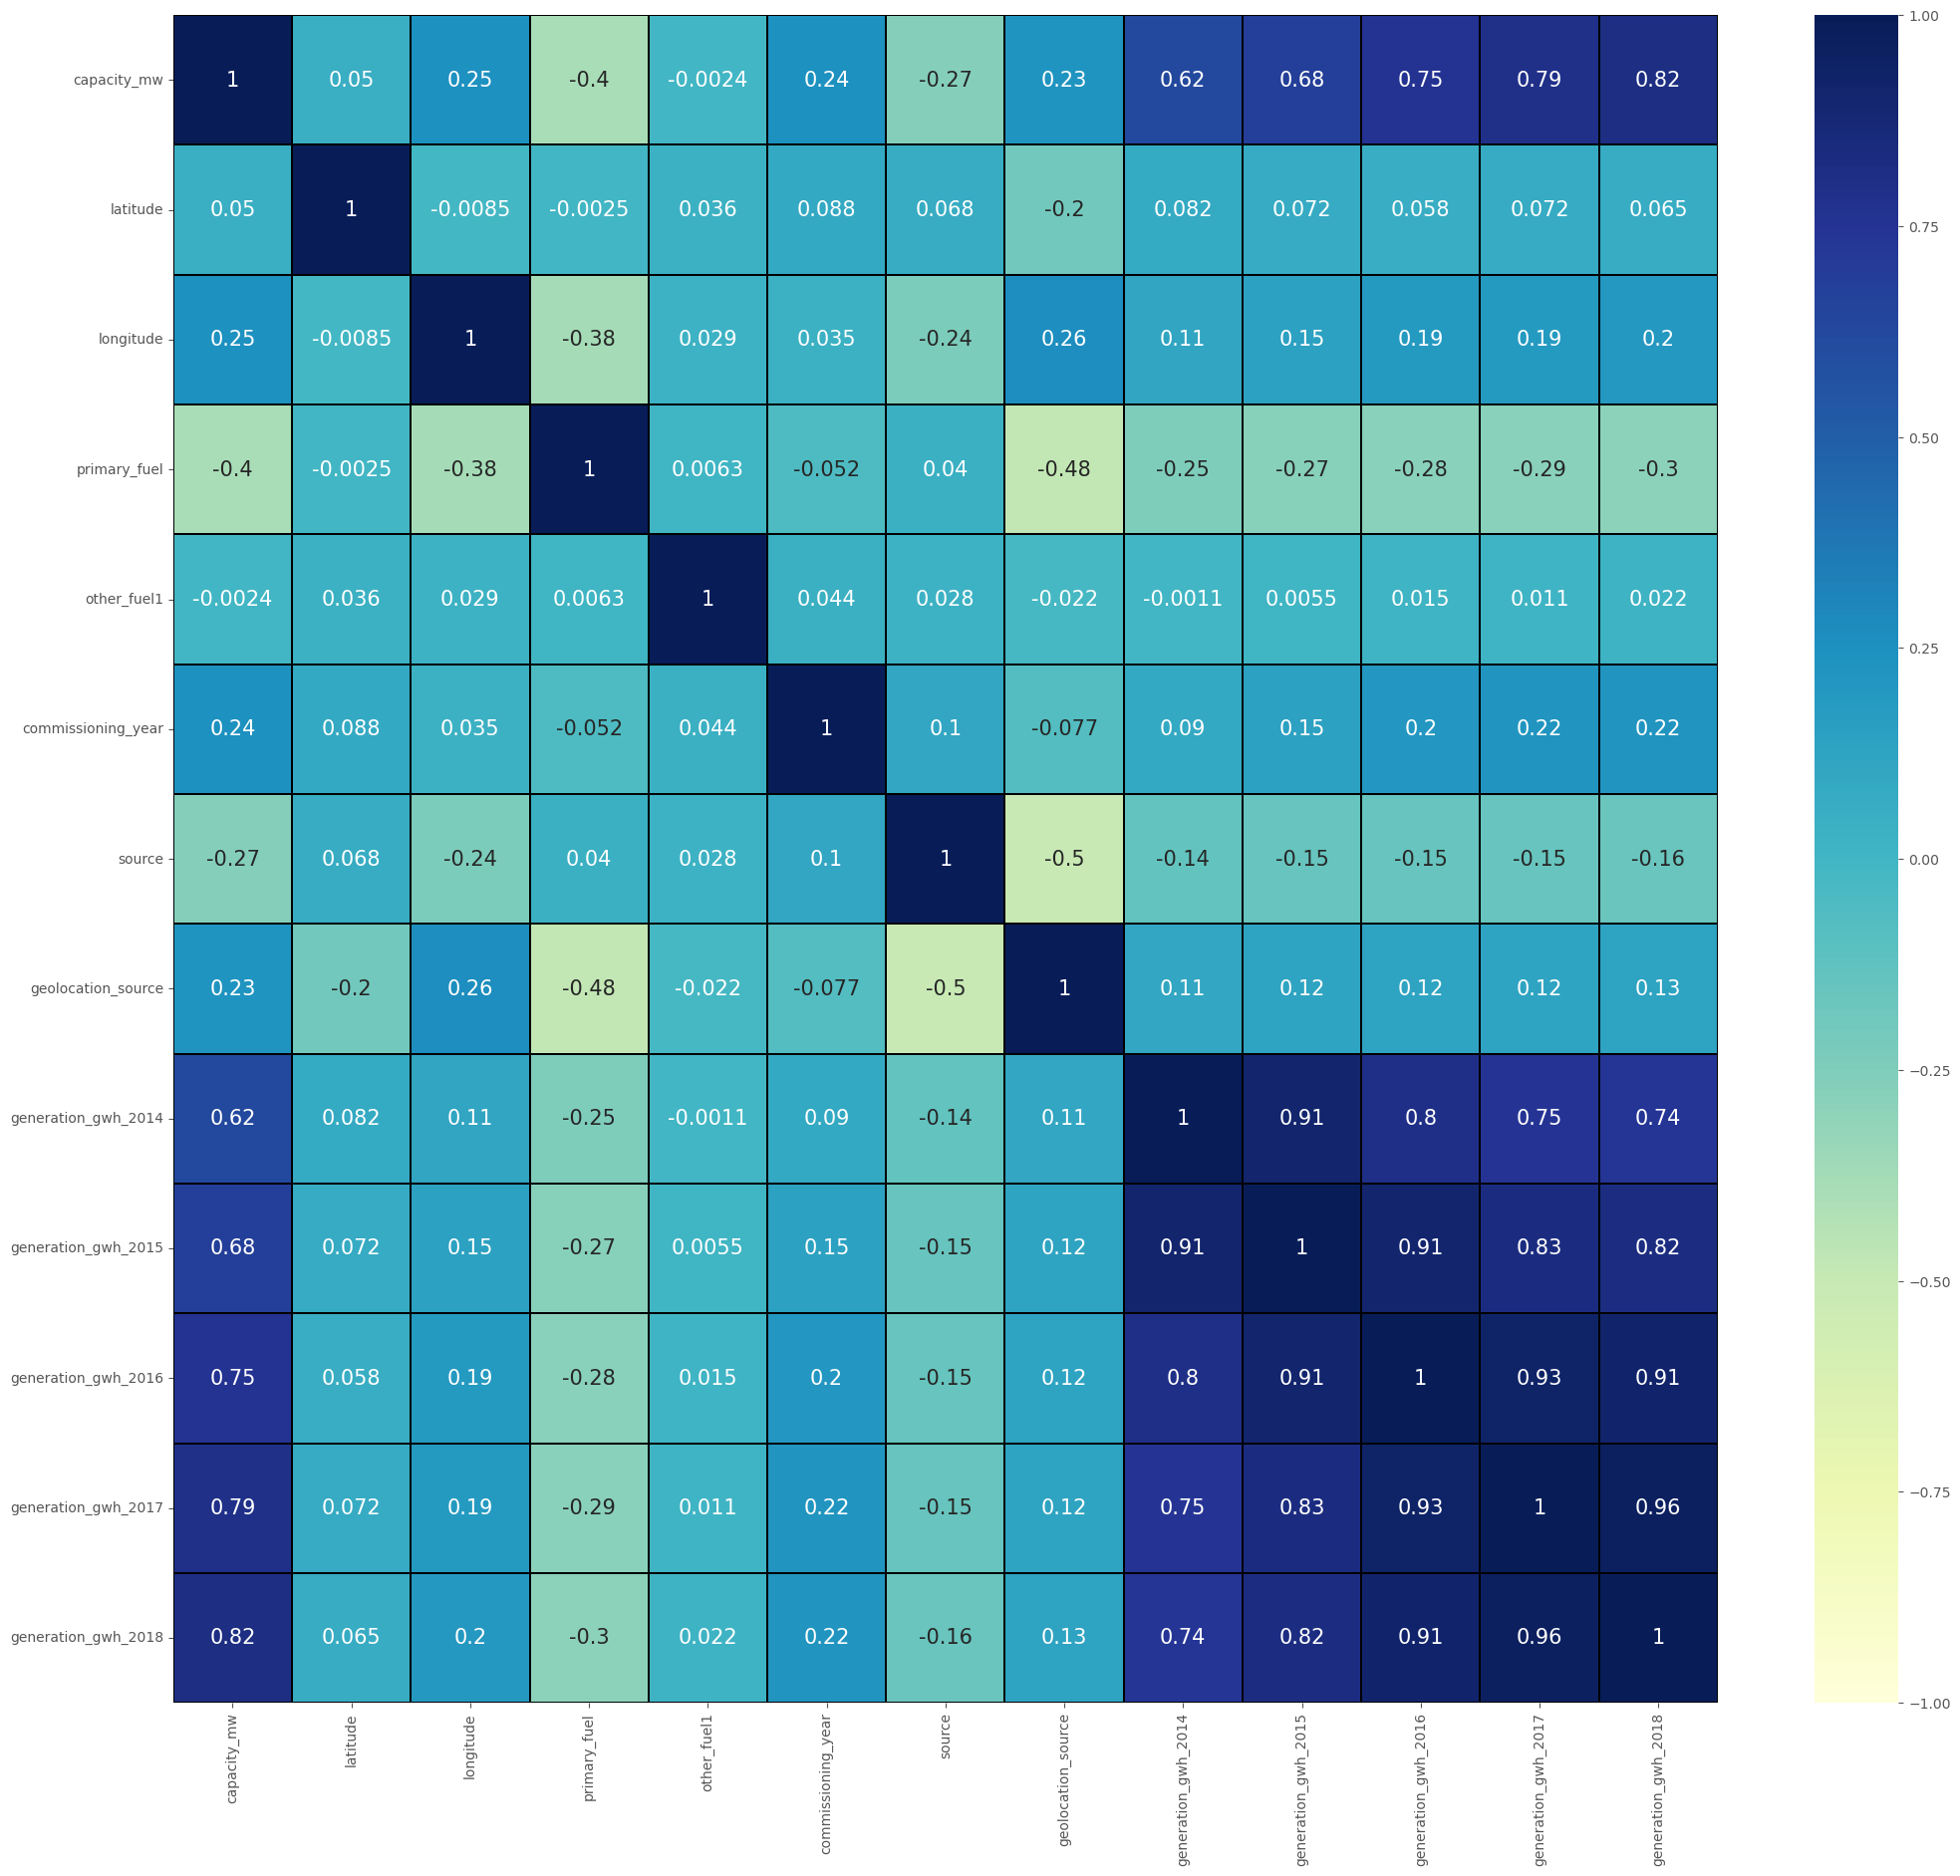

In [38]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);


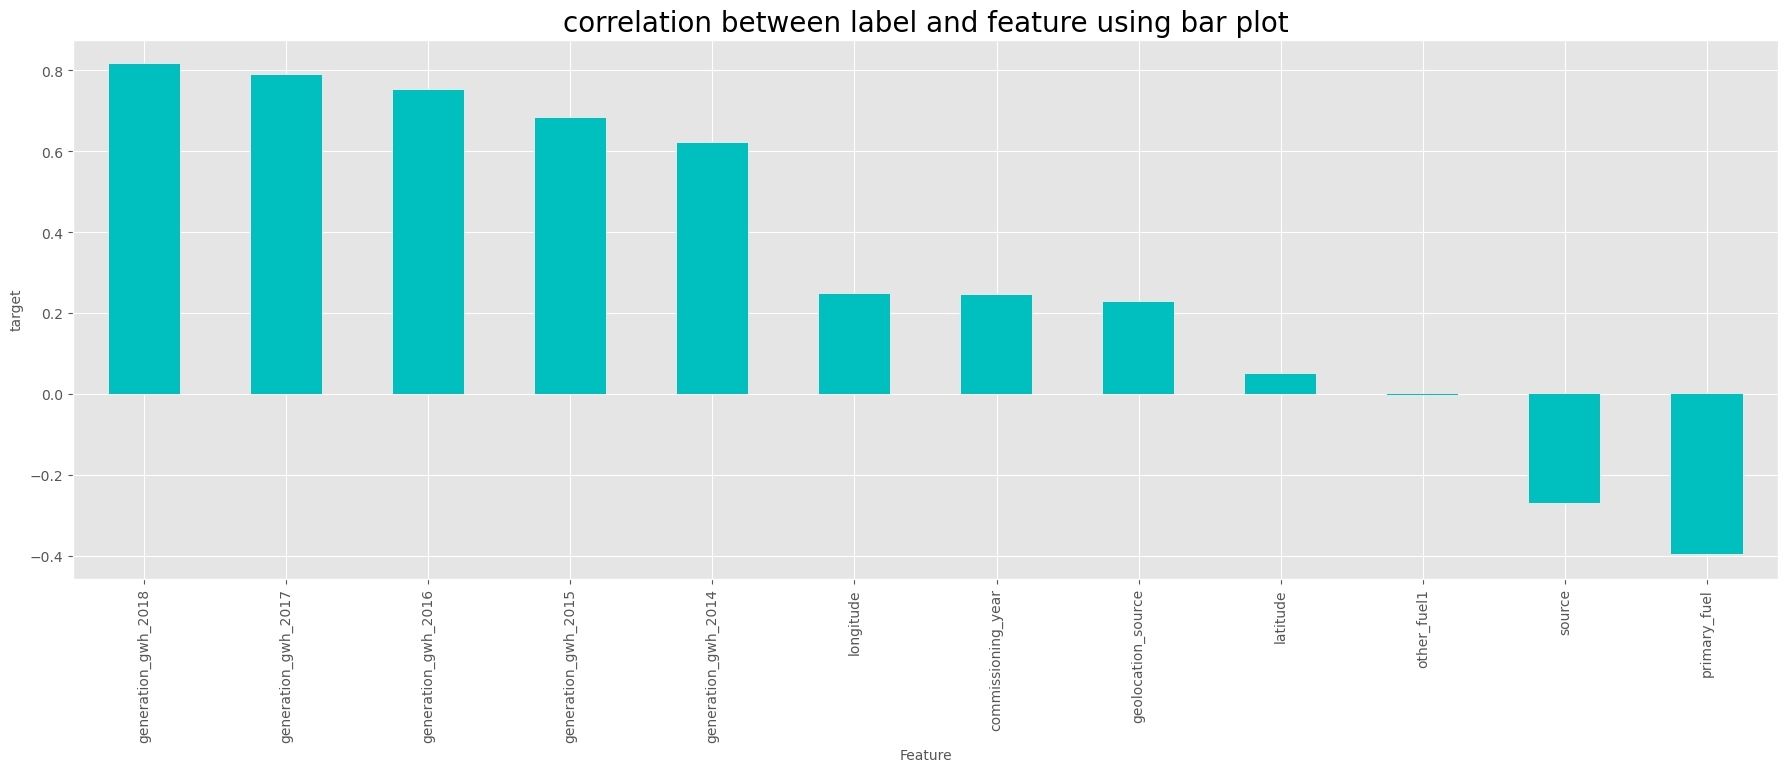

In [39]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [40]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [41]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [42]:
x.skew()

longitude              0.960278
primary_fuel           0.426394
commissioning_year    -1.735483
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
dtype: float64

In [45]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.934302,-0.029032,-0.035813,-0.031801,-0.021216
1,-0.510612,-0.029032,-0.035813,-0.031801,-0.021216
2,-2.397092,-0.029032,-0.035813,-0.031801,-0.021216
3,2.420733,-0.254510,0.107749,0.120391,-0.186140
4,1.254159,1.443372,2.304539,2.292390,1.999708


In [47]:
x.skew()

longitude             -0.001995
primary_fuel           0.426394
commissioning_year    -1.735483
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    0.229695
generation_gwh_2015    0.165128
generation_gwh_2016    0.146190
generation_gwh_2017    0.127716
generation_gwh_2018    2.634701
dtype: float64

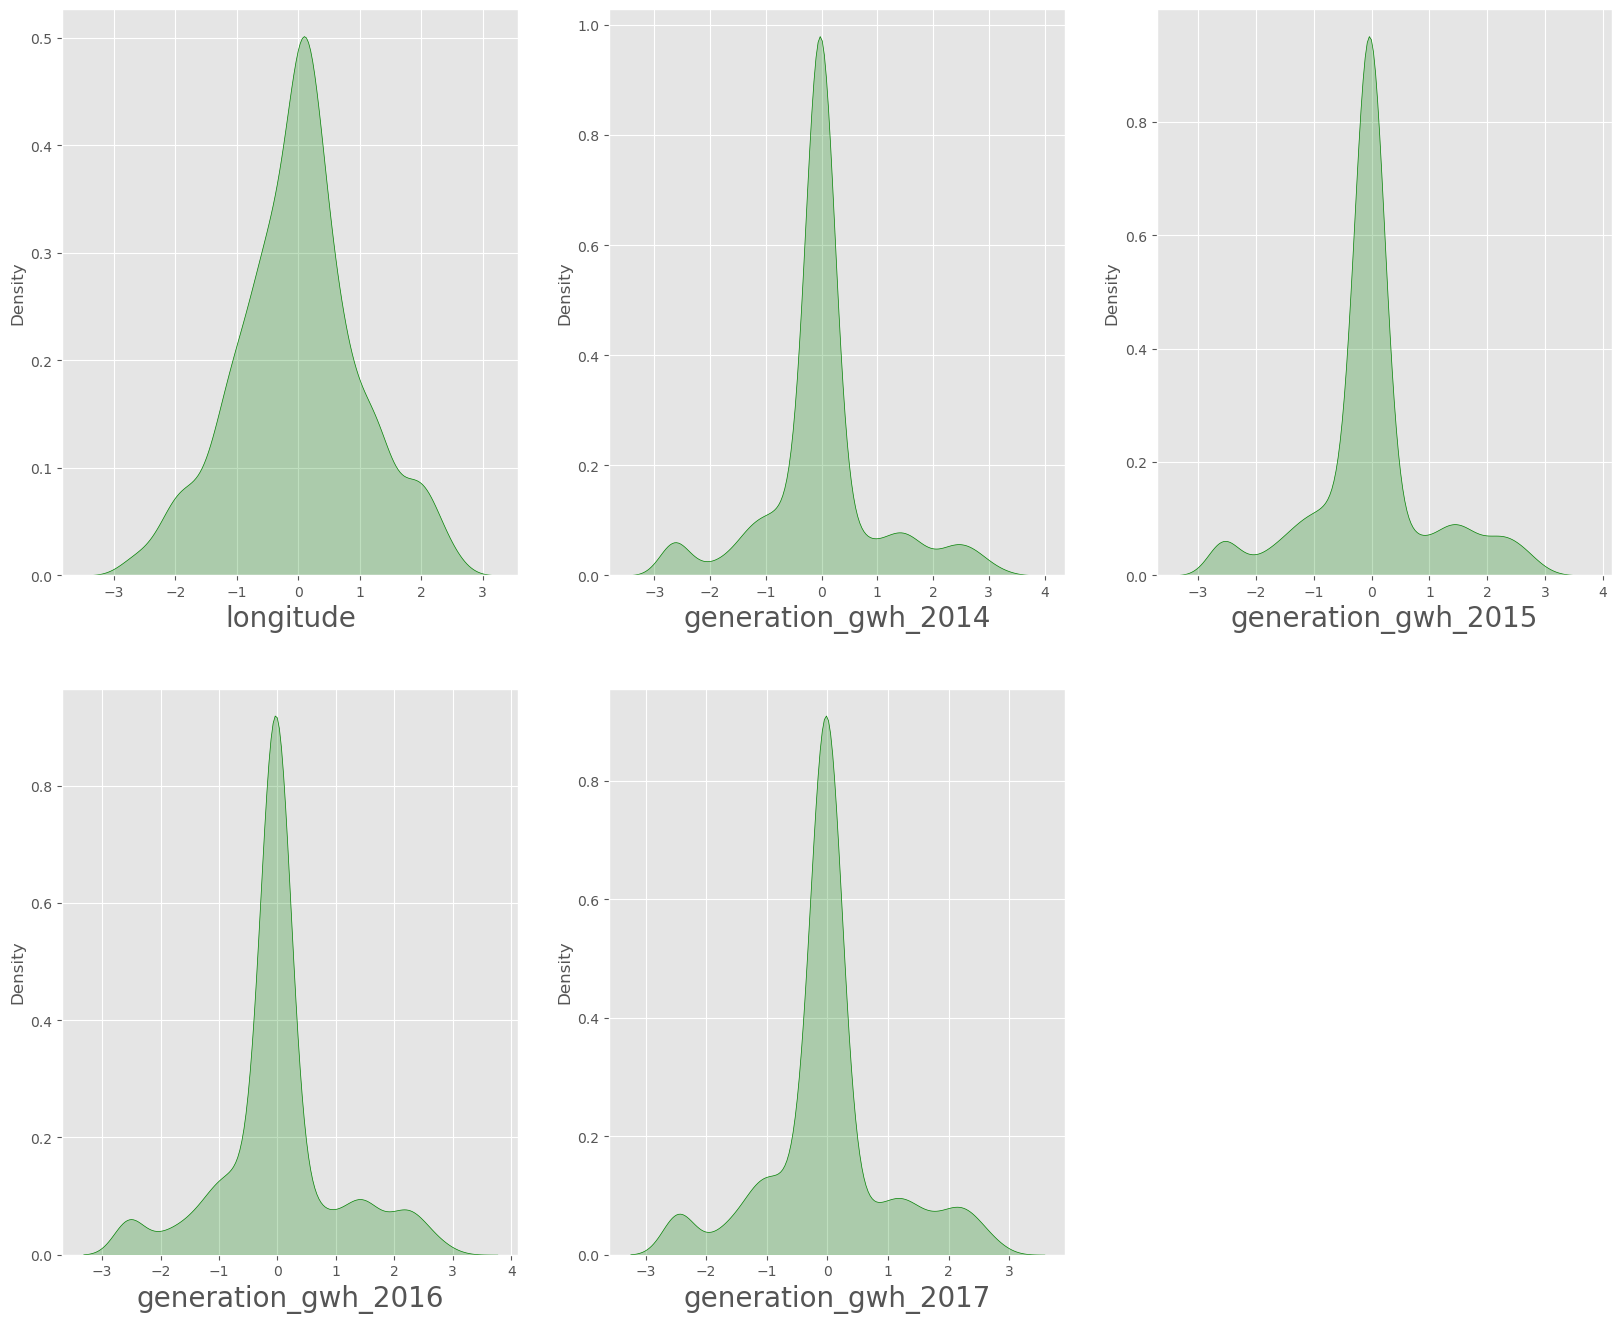

In [49]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.934302,1.191735,0.929761,1.421876,-1.056082,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
1,-0.510612,-0.984368,0.176018,2.858110,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
2,-2.397092,1.626956,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
3,2.420733,-0.549148,0.402141,-0.500469,0.401679,-0.254510,0.107749,0.120391,-0.186140,-0.388852
4,1.254159,-0.984368,1.231259,-0.500469,0.401679,1.443372,2.304539,2.292390,1.999708,3.398028
...,...,...,...,...,...,...,...,...,...,...
866,0.223088,-0.984368,1.306633,-0.500469,0.401679,-0.029032,-2.472163,-0.830994,0.024967,-0.354550
867,0.413097,1.191735,0.176018,0.714806,-2.513844,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
868,-0.234349,1.626956,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
869,-0.772306,-0.984368,0.176018,0.317080,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.305317,longitude
1,1.769492,primary_fuel
2,1.096614,commissioning_year
3,1.616771,source
4,1.888743,geolocation_source
5,3.583740,generation_gwh_2014
6,6.246566,generation_gwh_2015
7,9.621649,generation_gwh_2016
8,6.822832,generation_gwh_2017
9,3.810461,generation_gwh_2018


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8739526131885146  on Random_state  78


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [56]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.8829467114733467
MAE: 74.87619638027574
MSE: 20651.54946995639
RNSE: 143.70646982636652


In [57]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.6278588530456396
MAE: 117.87081679389314
MSE: 65656.34680468052
RNSE: 256.23494454246577


In [58]:
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.8522561672085356
MAE: 87.70978854961832
MSE: 26066.23966040168
RNSE: 161.45042477615746


In [59]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8527237594074508
MAE: 83.10250973617046
MSE: 25983.743016785676
RNSE: 161.19473631848427


In [60]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8493766753181027
MAE: 81.45879521310431
MSE: 26574.26442392698
RNSE: 163.01614773980822


In [61]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7747164015247362


In [62]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.6355222367131678


In [63]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7508037611178546


In [64]:
print(cross_val_score(GB,x,y,cv=5).mean())

0.7427275895500094


In [65]:
print(cross_val_score(BR,x,y,cv=5).mean())

0.7479348476146594


# Hyper Parameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [67]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [69]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [70]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 143.70646982636652
R2_Score: 88.93612234159252


In [71]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Prediction for Primary_Fuel

In [72]:
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [73]:
x_df.skew()

capacity_mw            2.207091
longitude              0.960278
commissioning_year    -1.735483
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
dtype: float64

In [76]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [77]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.684521,-0.934302,-0.029032,-0.035813,-0.031801,-0.021216
1,0.238524,-0.510612,-0.029032,-0.035813,-0.031801,-0.021216
2,-0.258955,-2.397092,-0.029032,-0.035813,-0.031801,-0.021216
3,0.410243,2.420733,-0.254510,0.107749,0.120391,-0.186140
4,1.741342,1.254159,1.443372,2.304539,2.292390,1.999708


In [78]:
x_df.skew()

capacity_mw            0.019455
longitude             -0.001995
commissioning_year    -1.735483
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    0.229695
generation_gwh_2015    0.165128
generation_gwh_2016    0.146190
generation_gwh_2017    0.127716
generation_gwh_2018    2.634701
dtype: float64

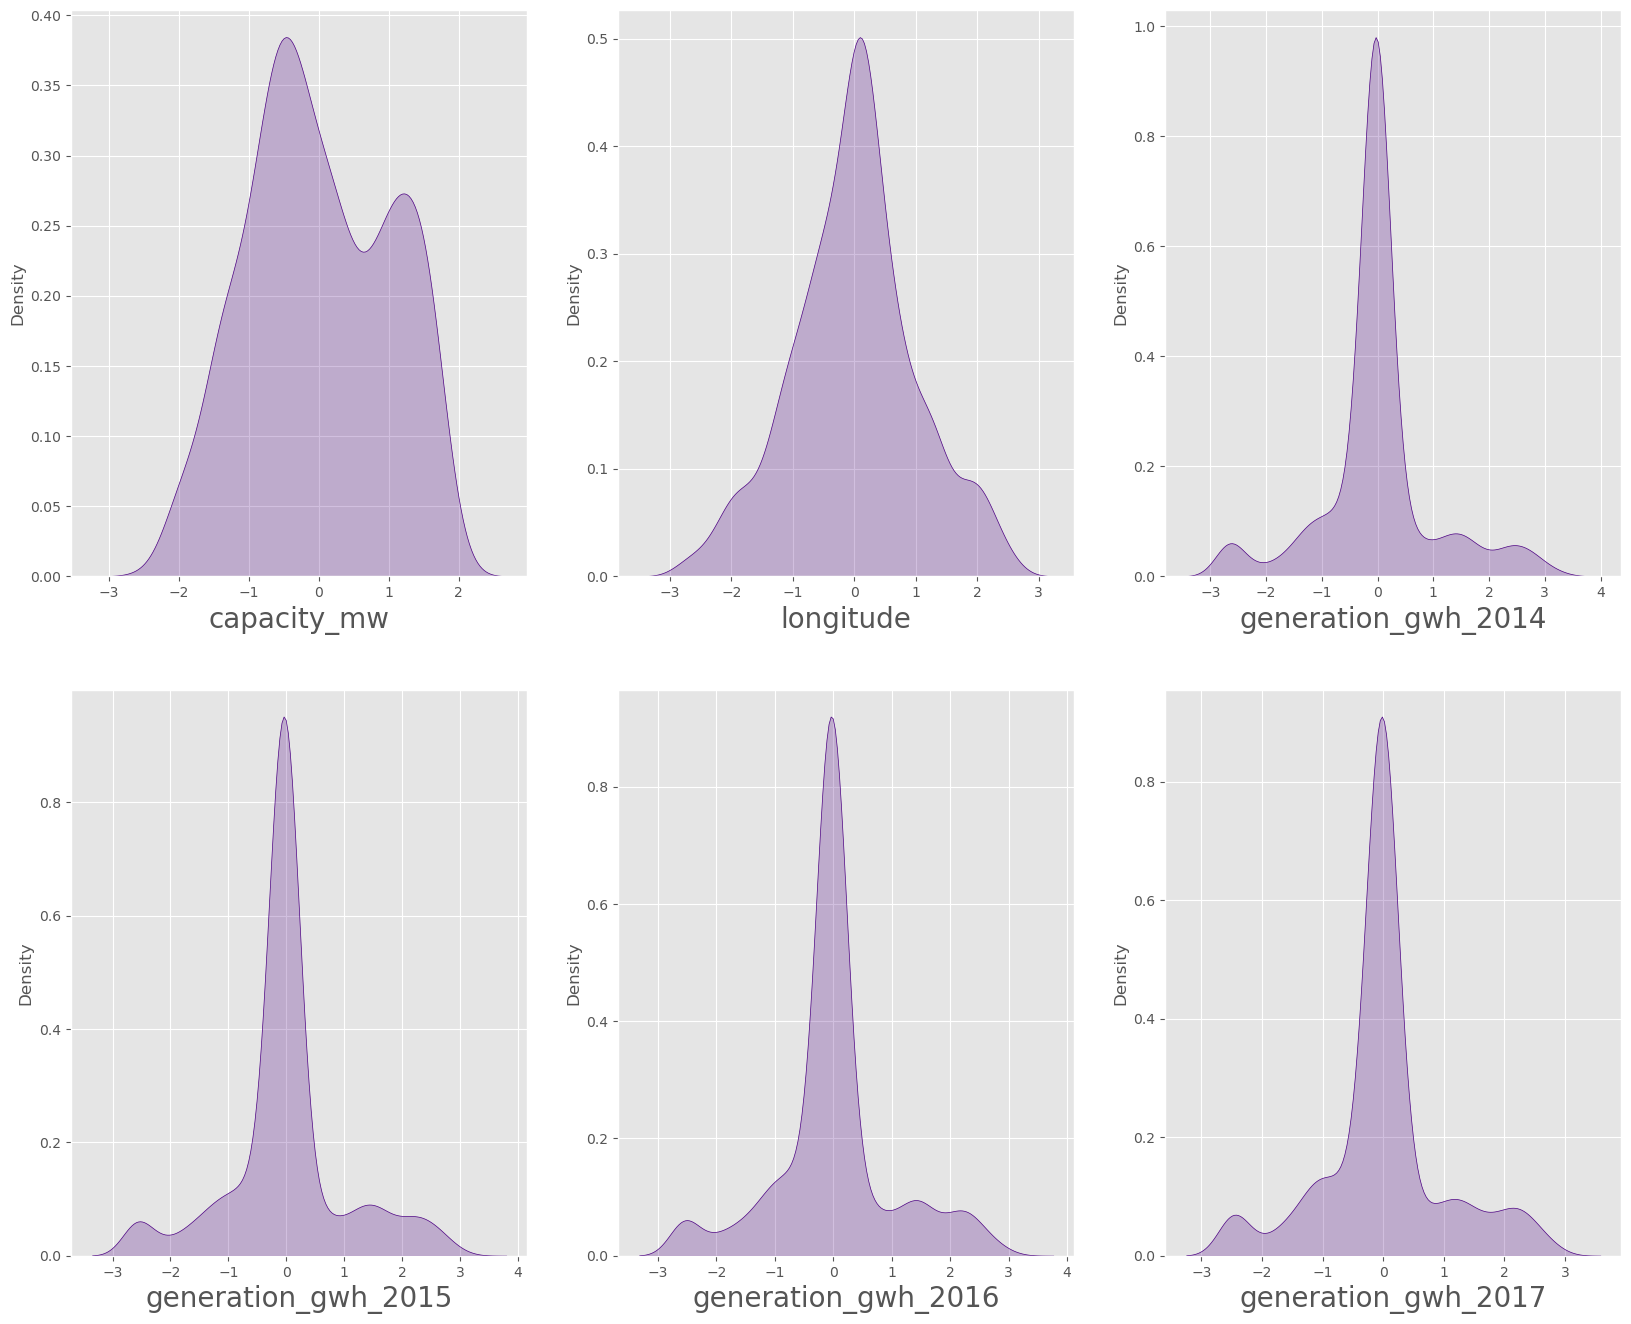

In [79]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df


,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.684521,-0.934302,0.929761,1.421876,-1.056082,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
1,0.238524,-0.510612,0.176018,2.858110,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
2,-0.258955,-2.397092,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
3,0.410243,2.420733,0.402141,-0.500469,0.401679,-0.254510,0.107749,0.120391,-0.186140,-0.388852
4,1.741342,1.254159,1.231259,-0.500469,0.401679,1.443372,2.304539,2.292390,1.999708,3.398028
...,...,...,...,...,...,...,...,...,...,...
866,1.683169,0.223088,1.306633,-0.500469,0.401679,-0.029032,-2.472163,-0.830994,0.024967,-0.354550
867,-1.603484,0.413097,0.176018,0.714806,-2.513844,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
868,-0.494119,-0.234349,0.176018,-0.522564,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469
869,0.129055,-0.772306,0.176018,0.317080,0.401679,-0.029032,-0.035813,-0.031801,-0.021216,-0.317469


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,2.096869,capacity_mw
1,1.190873,longitude
2,1.118545,commissioning_year
3,1.439081,source
4,1.604468,geolocation_source
5,3.599475,generation_gwh_2014
6,6.246888,generation_gwh_2015
7,9.626244,generation_gwh_2016
8,6.865874,generation_gwh_2017
9,4.342705,generation_gwh_2018


In [82]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [83]:
y_df.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9010416666666666  on Random_state  12


In [85]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [87]:
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.8940972222222222
[[70  2  0  0  0  0  0  1]
 [ 3 50  9  3  0  2  0  0]
 [ 1  4 44  6  0  5  1  3]
 [ 0 12  2 55  0  0  0  0]
 [ 0  0  3  2 80  1  0  0]
 [ 0  0  1  0  0 70  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.74      0.75      0.74        67
           2       0.75      0.69      0.72        64
           3       0.83      0.80      0.81        69
           4       1.00      0.93      0.96        86
           5       0.90      0.99      0.94        71
           6       0.99      1.00      0.99        78
           7       0.94      1.00      0.97        68

    accuracy                           0.89       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.89      0.89      0.89       576



In [88]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))

0.9322916666666666
[[71  0  0  0  0  0  0  2]
 [ 2 51  8  2  1  3  0  0]
 [ 1  1 56  1  0  3  0  2]
 [ 0  7  3 58  1  0  0  0]
 [ 0  0  0  1 84  1  0  0]
 [ 0  0  0  0  0 71  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.86      0.76      0.81        67
           2       0.84      0.88      0.85        64
           3       0.94      0.84      0.89        69
           4       0.98      0.98      0.98        86
           5       0.91      1.00      0.95        71
           6       1.00      1.00      1.00        78
           7       0.94      1.00      0.97        68

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576



In [89]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.8072916666666666
[[64  0  0  0  0  0  0  9]
 [ 6 31 16  0  7  3  0  4]
 [ 1  5 42  1  1 10  0  4]
 [ 0 13  8 35  2  1  0 10]
 [ 0  0  0  1 85  0  0  0]
 [ 1  0  1  0  0 64  0  5]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  1  0  0  0  0 67]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.63      0.46      0.53        67
           2       0.62      0.66      0.64        64
           3       0.95      0.51      0.66        69
           4       0.89      0.99      0.94        86
           5       0.82      0.90      0.86        71
           6       1.00      0.99      0.99        78
           7       0.68      0.99      0.80        68

    accuracy                           0.81       576
   macro avg       0.81      0.80      0.79       576
weighted avg       0.82      0.81      0.80       576



In [90]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.875
[[71  0  0  0  0  0  0  2]
 [ 4 37 15  2  4  3  0  2]
 [ 1  0 53  2  0  5  0  3]
 [ 0  8  8 47  1  0  0  5]
 [ 0  0  1  0 85  0  0  0]
 [ 1  0  3  0  0 67  0  0]
 [ 0  0  2  0  0  0 76  0]
 [ 0  0  0  0  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.82      0.55      0.66        67
           2       0.65      0.83      0.73        64
           3       0.92      0.68      0.78        69
           4       0.94      0.99      0.97        86
           5       0.89      0.94      0.92        71
           6       1.00      0.97      0.99        78
           7       0.85      1.00      0.92        68

    accuracy                           0.88       576
   macro avg       0.87      0.87      0.86       576
weighted avg       0.88      0.88      0.87       576



In [91]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.9236111111111112
[[72  0  0  0  0  0  0  1]
 [ 3 52  5  2  2  3  0  0]
 [ 1  5 51  3  0  3  0  1]
 [ 0  5  5 58  1  0  0  0]
 [ 0  0  0  1 83  2  0  0]
 [ 1  0  0  0  0 70  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.84      0.78      0.81        67
           2       0.84      0.80      0.82        64
           3       0.91      0.84      0.87        69
           4       0.97      0.97      0.97        86
           5       0.90      0.99      0.94        71
           6       1.00      1.00      1.00        78
           7       0.97      1.00      0.99        68

    accuracy                           0.92       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.92      0.92       576



In [92]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.9131944444444444
[[70  2  0  0  0  0  0  1]
 [ 2 53  5  2  3  2  0  0]
 [ 0  3 53  3  0  2  0  3]
 [ 0  5  8 53  3  0  0  0]
 [ 0  2  0  2 81  1  0  0]
 [ 0  0  1  0  0 70  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.82      0.79      0.80        67
           2       0.79      0.83      0.81        64
           3       0.88      0.77      0.82        69
           4       0.93      0.94      0.94        86
           5       0.93      0.99      0.96        71
           6       1.00      1.00      1.00        78
           7       0.94      1.00      0.97        68

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576



In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())

0.8744791666666666


In [95]:
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.915625


In [96]:
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7807291666666667


In [97]:
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())

0.8572916666666668


In [99]:
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())

0.8984375


In [100]:
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())

0.903125


# Hyper Parameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [103]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_df_train,y_df_train)

In [ ]:
GCV.best_params_

In [ ]:
fuel_type =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train,y_df_train).predict_proba(x_df_test)

# Binarize the output
y_df_test_bin = label_binarize(y_df_test, classes[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i],_=roc_curve(y_df_test_bin[:,i],y_score[:,i])
    roc_auc[i] = auc(false_positive_rate[i],true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc='lower right')
plt.show()
This is the AUC-ROC curve for th final mod

In [ ]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")